In [39]:
### Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, \
    classification_report, confusion_matrix, precision_score, recall_score,\
        f1_score, ConfusionMatrixDisplay,roc_auc_score
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore")

### Importing and Initializing StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [40]:
df = pd.read_csv("/home/ghost/Documents/Data Mining Mini Project/data/diabetes_data_encoded.csv")

In [41]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [42]:
X = df.iloc[:,:-1]

In [43]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [44]:
y = df.iloc[:,-1]

In [45]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [46]:
### Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=32)

In [47]:
X_train.shape, X_test.shape

((390, 16), (130, 16))

In [48]:
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])

In [49]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
172,0.973390,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
279,-0.411498,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0
118,1.380710,0,1,1,0,1,0,0,1,1,1,1,1,0,0,0
362,-1.633457,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
96,-1.470529,0,1,1,1,1,0,0,0,1,0,1,1,1,0,0


In [50]:
X_test["Age"] = scaler.transform(X_test[["Age"]])

In [51]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Neighbor": KNeighborsClassifier(),

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) ## Train model

    ## Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    ## Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("-----------------------------------------------------------")
    print("Training")
    print("-----------------------------------------------------------")
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 score: {model_train_f1:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- ROC AUC Score: {model_train_rocauc_score:.4f}")
    print("-----------------------------------------------------------")
    print("Test")
    print("-----------------------------------------------------------")
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 score: {model_test_f1:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall: {model_test_recall:.4f}")
    print(f"- ROC AUC Score: {model_test_rocauc_score:.4f}")
    print("-----------------------------------------------------------")
    print("\n")

Logistic Regression
-----------------------------------------------------------
Training
-----------------------------------------------------------
- Accuracy: 0.9333
- F1 score: 0.9336
- Precision: 0.9574
- Recall: 0.9336
- ROC AUC Score: 0.9332
-----------------------------------------------------------
Test
-----------------------------------------------------------
- Accuracy: 0.9231
- F1 score: 0.9225
- Precision: 0.9157
- Recall: 0.9620
- ROC AUC Score: 0.9124
-----------------------------------------------------------


Decision Tree
-----------------------------------------------------------
Training
-----------------------------------------------------------
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------------------------------
Test
-----------------------------------------------------------
- Accuracy: 0.9769
- F1 score: 0.9769
- Precision: 0.9750
- Recall: 0.9873
- ROC AUC Score: 0.9741


### *GradientBoost And RandomForest* are the Best in term of
- Generalization And
- Avoiding Overfitting


### ROC-AUC Curve for Model Comparison
The ROC-AUC Curve (Receiver Operating Characteristic - Area Under Curve) helps visualize how well a model distinguishes between classes. A higher AUC score (closer to 1.0) indicates a better-performing model.

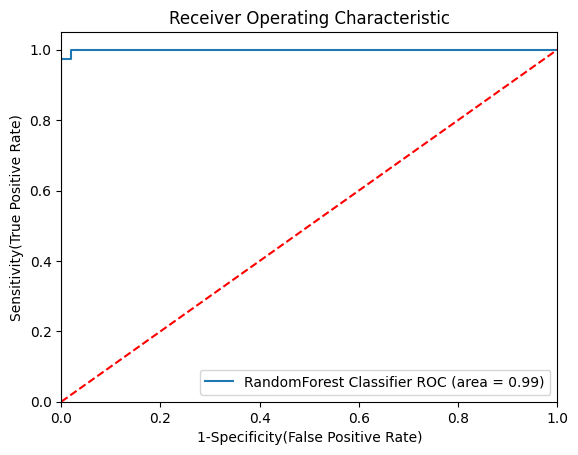

In [52]:
## Plot ROC-AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': "RandomForest Classifier",
    'model': RandomForestClassifier(),
    'auc':  0.9902
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

In [53]:
bestModel = RandomForestClassifier()
bestModel.fit(X_train,y_train)

## Make Predictions
y_train_pred = bestModel.predict(X_train)
y_test_pred = bestModel.predict(X_test)
print("Train Set")
print("Accuracy: ",accuracy_score(y_train, y_train_pred))
print("F1 Score: ",f1_score(y_train, y_train_pred))
print("Precision Score: ",precision_score(y_train, y_train_pred))
print("Recall Score: ",recall_score(y_train, y_train_pred))
print("ROC-AUC: ",roc_auc_score(y_train, y_train_pred))

print("Test Set")
print("Accuracy: ",accuracy_score(y_test, y_test_pred))
print("F1 Score: ",f1_score(y_test, y_test_pred))
print("Precision Score: ",precision_score(y_test, y_test_pred))
print("Recall Score: ",recall_score(y_test, y_test_pred))
print("ROC-AUC: ",roc_auc_score(y_test, y_test_pred))

Train Set
Accuracy:  1.0
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
ROC-AUC:  1.0
Test Set
Accuracy:  0.9923076923076923
F1 Score:  0.9937106918238994
Precision Score:  0.9875
Recall Score:  1.0
ROC-AUC:  0.9901960784313725


In [54]:
import pickle

In [55]:
# Save Model & Scaler
pickle.dump(bestModel, open("diabetes_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [56]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')